# Hypothesis Testing

Assume the null hypothesis is true, and then gather data to see if there is enough evidence to disprove this assumption. 
- this allows to not make hasty decisions which may be based on randomness in the data
- we also quantify uncertainty in our results

P-values: the probability of seeing the observed data, given the null hypothesis is true. 

Low p-value: there observed data is less likely to be seen if the null hypothesis is true, so we have enough evidence to reject the null hypothesis. 

High p-value: we're more likely to see the observed data under the null hypothesis. This translates to not having enough evidence to reject the null hypothesis. We never ACCEPT the null hypothesis. 

P-values are controversial nowadays. The p = 0.05 significance level was arbitrarily chosen by Ronald Fisher in 1920s; which means, for example in the medical field, p = 0.051 might deem the treatment worthless while p = 0.049 means it is amazing. 

## Which test is appropriate for your data?

There are various types of hypothesis testing and which type to use depends on what kind of data we have. Broadly, categorical and continuous data types have different hypothesis testing techiques. 

### Continous Data

#### T-test

Determining if data from two sources come from the same normal distribution by: 
- comparing means of two datasets
- assuming the have equal variances
- determine whether a single process could've yielded both data sets. 


In [2]:
# loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

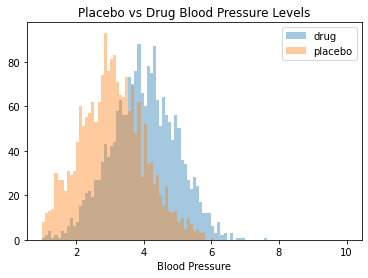

In [34]:
np.random.seed(123)
drug = np.random.normal(loc= 4, scale=1, size = 2000)
placebo = np.random.normal(loc=3, scale=1, size = 2000)

bins = np.linspace(1, 10, 100)
plt.hist(drug, bins, alpha = 0.4, label = "drug")
plt.hist(placebo, bins, alpha = 0.4, label = "placebo")
plt.title('Placebo vs Drug Blood Pressure Levels')
plt.xlabel('Blood Pressure')
plt.legend()
plt.show()

Do these two curve come from a the same distribution? Meaning, does the drug have any effect on the blood pressure? 

##### One-sample test

$$ t = \frac{\overline{x} - \mu_{test}}{\left(s\,\big/ \sqrt{n}\right)}$$

- t : t-statistic
- $\overline{x}$ : sample mean
- $\mu$ : value we're testing against
- s: standard deviation
- n: sample size



For this kind of t test, we compare the mean of measured group to a known mean. For example, we know a competing store has $45 average customer spend and we want to see if there is a statistical difference between their average customer spend and ours. 

In [38]:
from scipy import stats
from scipy.stats import norm #for plotting

In [42]:
our_store = np.random.normal(loc = 44, scale = 2, size = 5000)
one_sample_test = stats.ttest_1samp(our_store, 45)
print(one_sample_test)


Ttest_1sampResult(statistic=-35.12834810994164, pvalue=8.252807994169369e-242)


- T-statistic: -35.13
- p-value: the probability of seeing the observed average customer spend, *given the average spend is the same for both stores* (our store and the competing store). It is very small, hence we have enough evidence to reject the null (our customer spend = competitor's customer spend). In other words, under the null hypothesis, we have 8.252807994169369e-240 % chance of seeing the observed data. 

Assumptions:
- Independence
- Mean of sample comes from a normal distribution (either sample is normally distributed or it is large enough to assume CLT)
- Variance of our known sample is the same as that of unknown sample. 

#### Two-sample unpaired t-test

We use this test, when we have both samples. In the above example, in addition to our data, we also have our competitor's. Then we can test if we have different average customer spends. 

Hypothesis test: the average customer spend is the same between two stores
Alternative: the average customer spends are different

The t-statistic calculation: 

$$ t = \frac{(\overline{X}_1 - \overline{X}_2) - (\mu_1 - \mu_2)}{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

- $\overline{X}_1$ and $\overline{X}_2$ : sample means
- $(\mu_1 - \mu_2)$ : population mean difference we are testing against, usually zero if we are testing against the null as above
- $s_p$ : pooled standard deviation

$$s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$$

$s_1^2$ and $s_2^2$: two sample variances

In [43]:
#generating the competing store's purchases
competing_store = np.random.normal(loc = 48, scale = 1, size = 4000)
two_sample_test = stats.ttest_ind(our_store, competing_store)
print(two_sample_test)

Ttest_indResult(statistic=-115.3409680239054, pvalue=0.0)


The average customer spend for our store is 44 and that of competing store is 48. With the two-sample t-test, we have enough evidence to reject the null hypothesis with a p-value of 0. We can conclude that there is a statistically significant difference in average customer spend between the two stores. 

Assumptions: 
- Independence within each sample
- Sample A independent from sample B
- Both samples are from a normal distribution (are normally distributed or large enough to assume CLT)
- Variances are identical


In [44]:
print(np.var(our_store))
print(np.var(competing_store))

3.9965225140207257
1.0358648106604913


Our last assumption about equal variance is violated. This was purposely done when defining the scale argument in both samples. 

#### Two-sample Paired t-test

The difference in customer spend between two stores above might be due to different kind of customers visiting the stores, rather than difference between spending when shopping. 